In [1]:
# 모듈 불러오기

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import KFold
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
# 다발성 경화증 예측을 위한 데이터 불러오기
df = pd.read_csv('Mydata.csv')
df

,Gender,Age,Schooling,Initial_Symptom,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,...,V_1,V_2,V_3,MP_1,MP_2,MP_3,OB_1,0B_2,OB_3,group
0,1,34,20,2,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,1,61,25,10,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,1,22,20,3,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,2,41,15,7,0,1,1,0,1,1,...,1,0,0,0,1,0,0,1,0,1
4,2,34,20,6,1,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,9,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
269,1,21,15,5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
270,2,19,12,13,1,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
271,2,32,15,15,1,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0


## RandomForest 모델링 진행
- 교차검증을 통한 베스트 파라미터를 찾는 것까지 진행

(218, 24)
(55, 24)
0.9817


0.7818


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.02it/s]


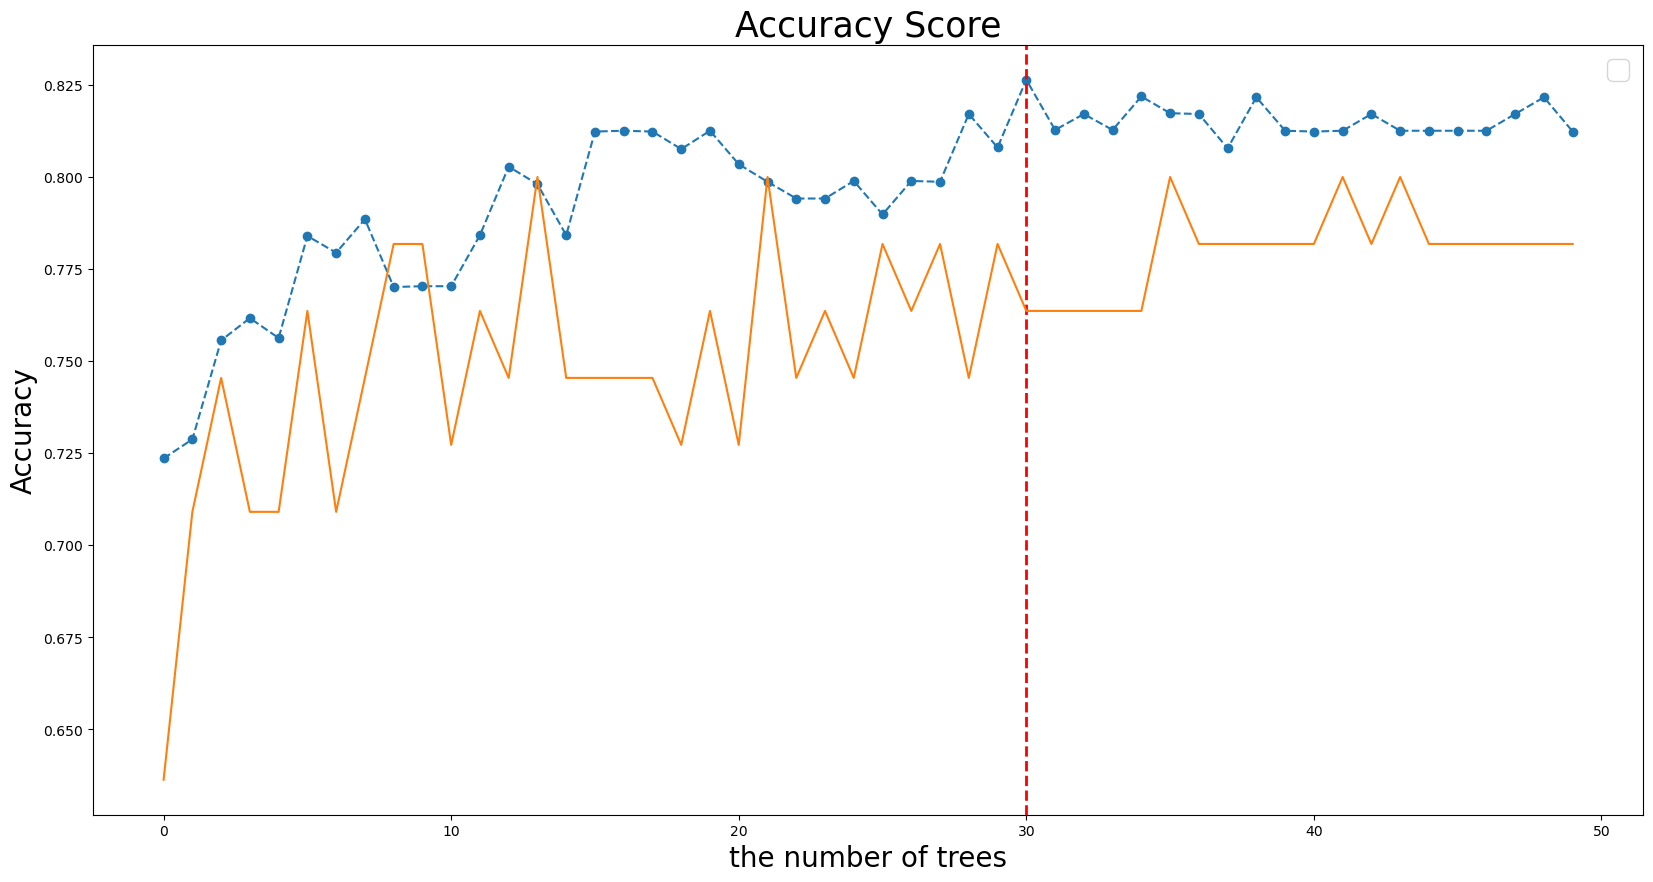

In [3]:
X = df[['Gender', 'Age', 'Schooling', 'Initial_Symptom', 'LLSSEP', 'ULSSEP',
       'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI',
       'Infratentorial_MRI', 'Spinal_Cord_MRI', 'BF_1', 'BF_2', 'BF_3', 'V_1',
       'V_2', 'V_3', 'MP_1', 'MP_2', 'MP_3', 'OB_1', '0B_2', 'OB_3']]
y = df['group']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2023) 

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

rfc = RandomForestClassifier(n_estimators = 10, random_state = 2023)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = rfc.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(round(acc,4))

cv_scores = []
test_scores = []
estimators_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):            #
    rfc = RandomForestClassifier(n_estimators = i+1,
                                n_jobs = 1,
                                random_state = 2023)
    score = cross_val_score(rfc, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    cv_scores.append(score)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores.append(acc)
    
    
best_e = [estimators_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize = (20, 10))
plt.legend(["Croess validation scores"], fontsize = 20)
plt.plot(estimators_list, cv_scores, marker = 'o', linestyle = 'dashed')
plt.xlabel("the number of trees", fontsize =20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy Score", fontsize = 25)
plt.axvline(best_e[0], color = 'r', linestyle='--', linewidth = 2)
plt.plot(test_scores)
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 2023) 

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(218, 24)
(55, 24)


In [5]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 2023)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2023)

In [6]:
y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = rfc.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(round(acc,4))

0.9817


0.7818


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.89it/s]


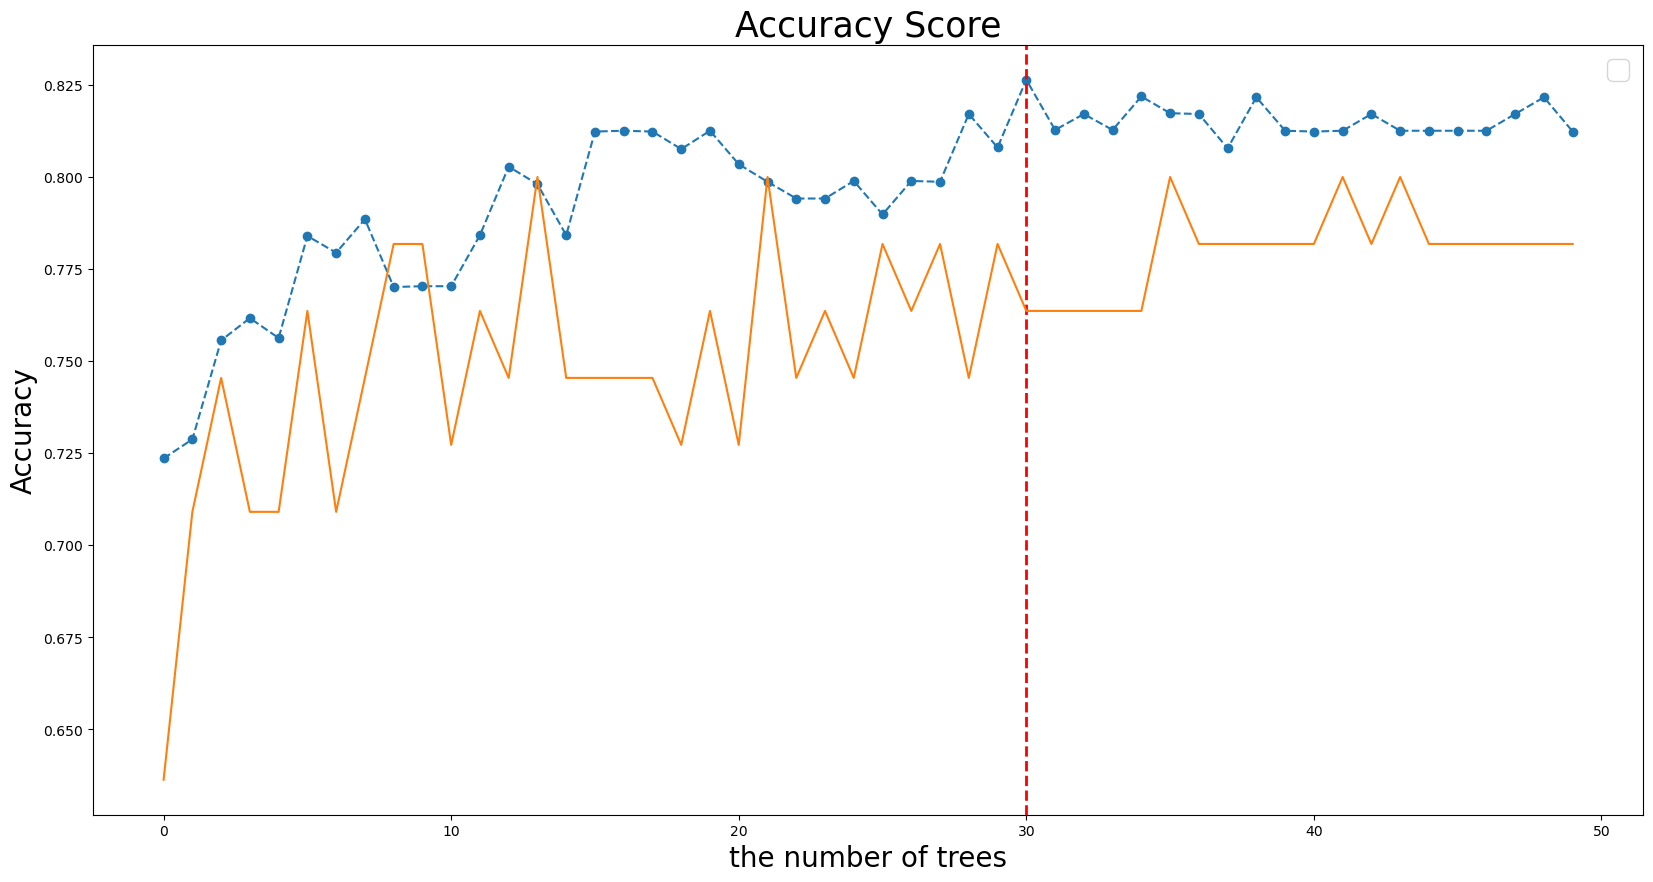

In [7]:
cv_scores = []
test_scores = []
estimators_list = [i for i in range(0,50,1)]
for i in tqdm(range(0,50,1)):            #
    rfc = RandomForestClassifier(n_estimators = i+1,
                                n_jobs = 1,
                                random_state = 2023)
    score = cross_val_score(rfc, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    cv_scores.append(score)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores.append(acc)
    
    
best_e = [estimators_list[i] for i in range(len(cv_scores)) if cv_scores[i] == np.max(cv_scores)]
plt.figure(figsize = (20, 10))
plt.legend(["Croess validation scores"], fontsize = 20)
plt.plot(estimators_list, cv_scores, marker = 'o', linestyle = 'dashed')
plt.xlabel("the number of trees", fontsize =20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy Score", fontsize = 25)
plt.axvline(best_e[0], color = 'r', linestyle='--', linewidth = 2)
plt.plot(test_scores)
plt.show()


In [8]:
print(f"최적의 tree개수 : {(cv_scores.index(max(cv_scores)))+1}")
print("\n")
print("Trian set에 대한 성능(10 fold cross validation)")
print(f"정확도:{max(cv_scores):0.4f}")

최적의 tree개수 : 31


Trian set에 대한 성능(10 fold cross validation)
정확도:0.8264


In [9]:
rfc = RandomForestClassifier(n_estimators = 32, random_state = 2023)  
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = rfc.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(round(acc, 4))

1.0


0.7636


## 교차검증을 통해 베스트 파라미터를 찾기

In [10]:
rfc = RandomForestClassifier(random_state = 2023)
param_grid = {
    'n_estimators' : [i for i in range(50, 61, 1)],
    'max_depth' : [10,15,20],
    'max_leaf_nodes' : [50,100,200],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, verbose = 1 , n_jobs = -1)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 594 candidates, totalling 5940 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]},
             verbose=1)

In [11]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'n_estimators': 59}

In [12]:
best_rfc = CV_rfc.best_estimator_
best_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=100,
                       n_estimators=59, random_state=2023)

In [13]:
y_pred = best_rfc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = best_rfc.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(acc)

1.0


0.8


## RandomForest의 특성을 활용하여 Feature importance를 통해 중요한 변수 확인
- 아래 시각화를 통해 다발성 경화증으로 이어지게 되는 변수들 중에 Periventricular_MRI 변수가 가장 중요한 것으로 보여진다.

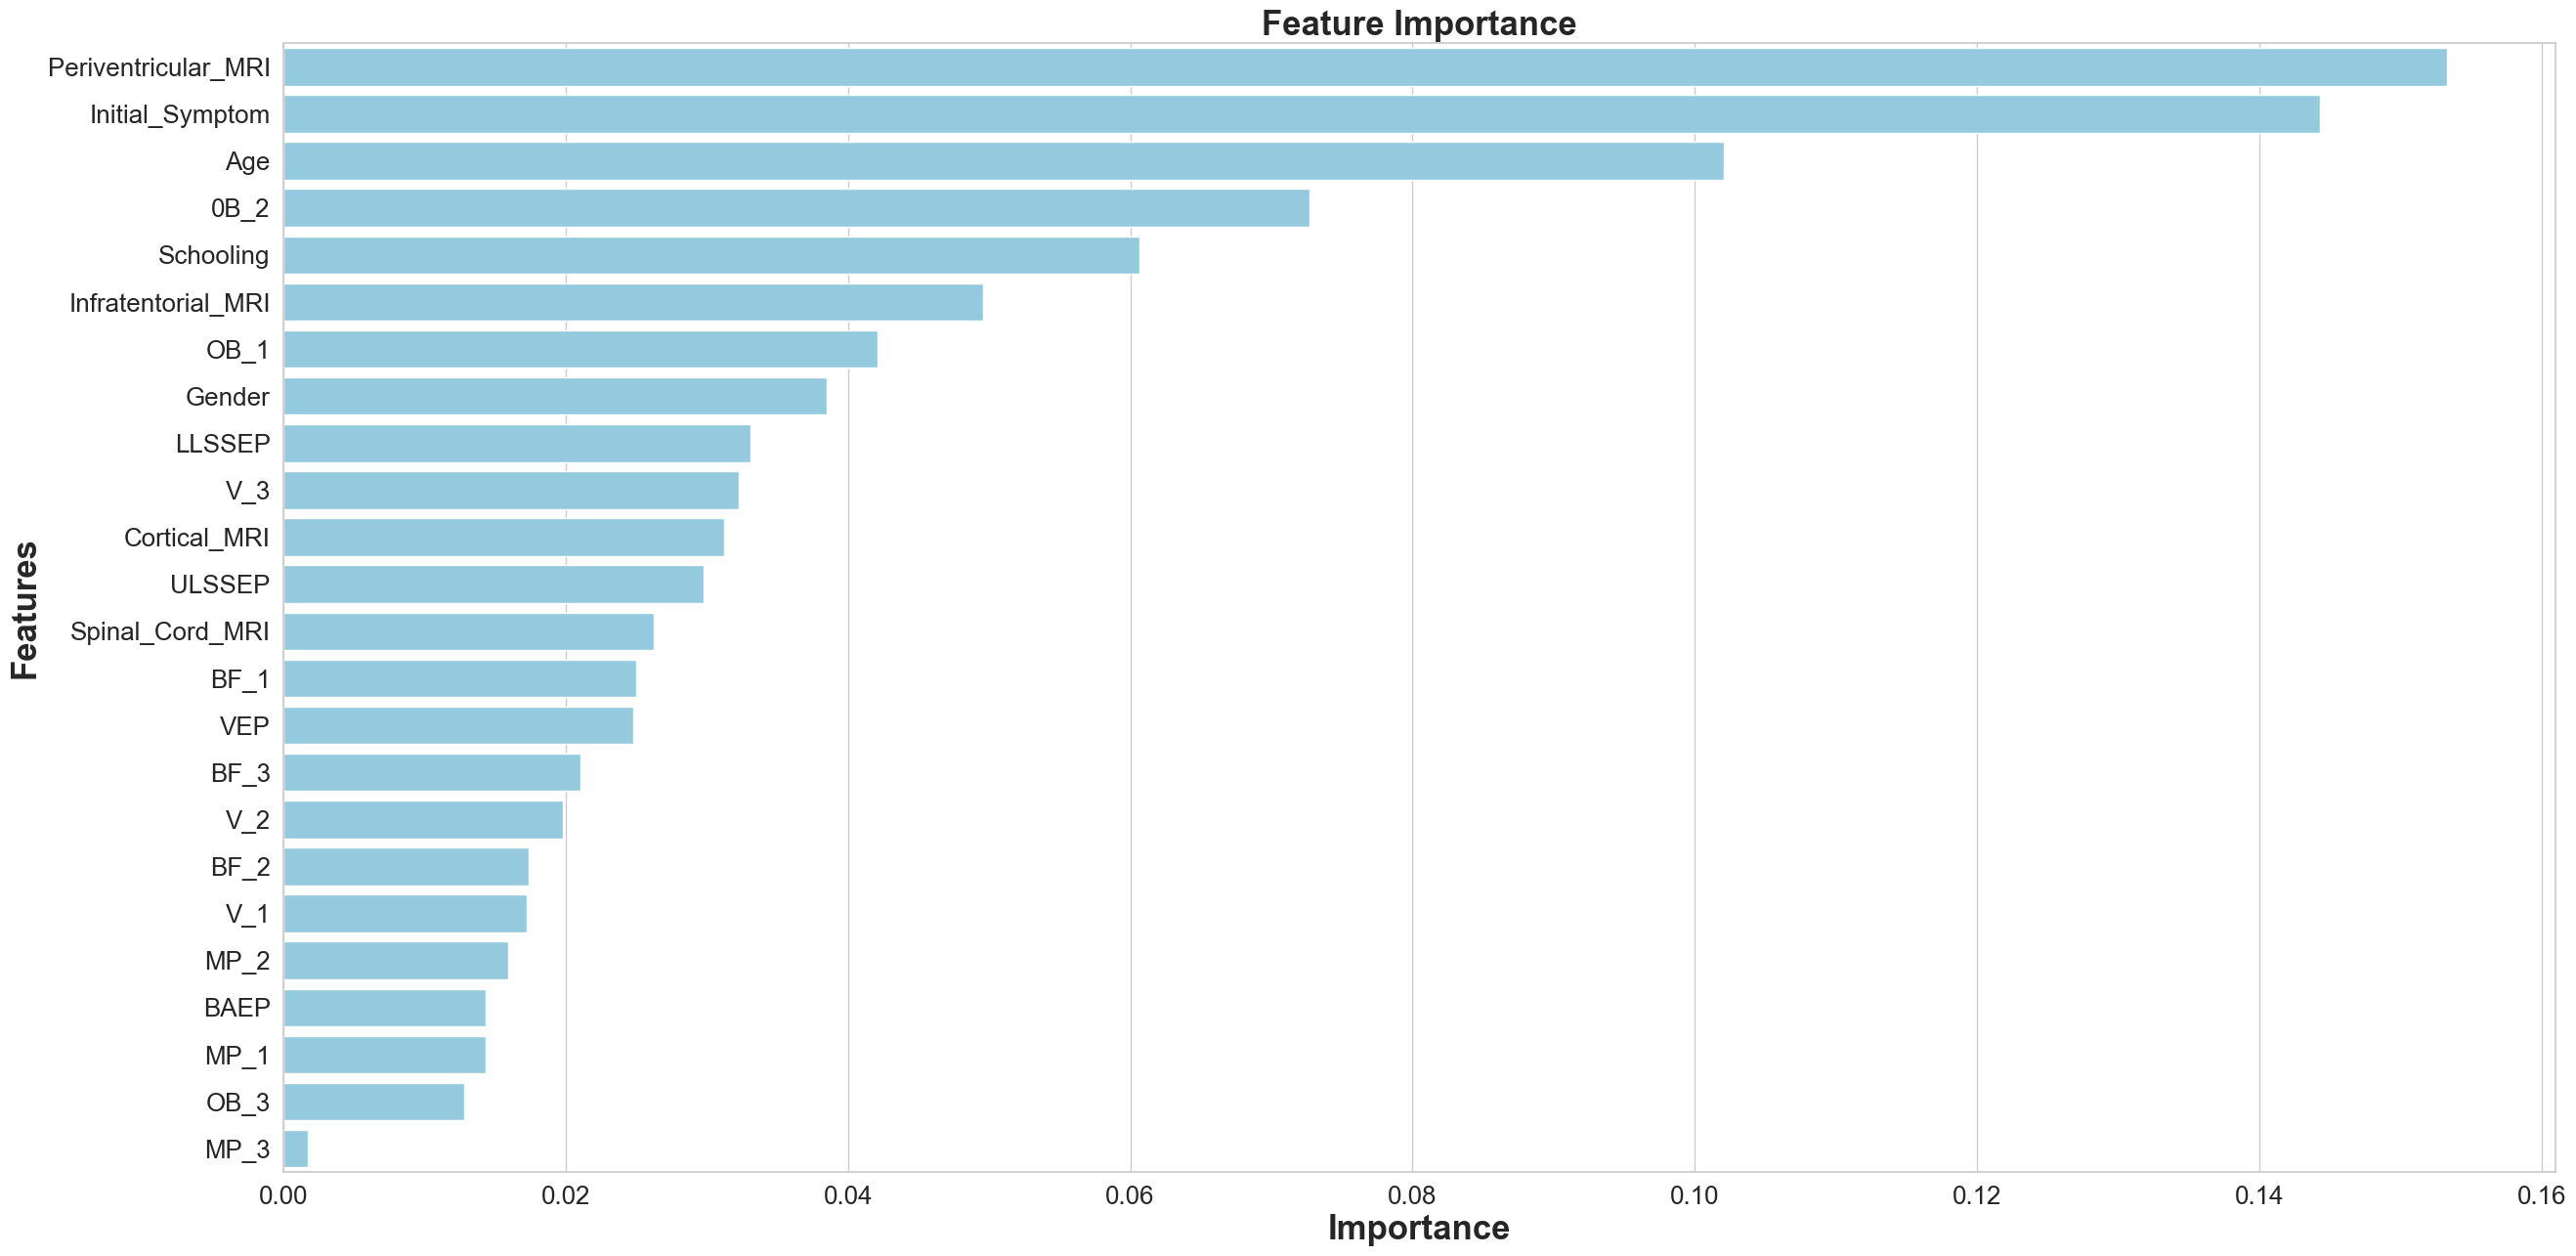

None

,Features,Gini-Importances
0,Periventricular_MRI,0.153316
1,Initial_Symptom,0.144280
2,Age,0.102034
3,0B_2,0.072730
4,Schooling,0.060651
5,Infratentorial_MRI,0.049599
6,OB_1,0.042069
7,Gender,0.038512
8,LLSSEP,0.033064
9,V_3,0.032283


In [14]:
feats = {}
for feature, importance in zip(X.columns, best_rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns = {0 : 'Gini-Importances'})
importances = importances.sort_values(by = 'Gini-Importances', ascending = False)
importances = importances.reset_index()
importances = importances.rename(columns={'index':'Features'})
sns.set(font_scale = 5)
sns.set(style = "whitegrid", color_codes = True, font_scale = 1.7)
fig, ax =plt.subplots()
fig.set_size_inches(30, 15)
sns.barplot(x = importances['Gini-Importances'], y = importances['Features'], data = importances, color = 'skyblue')
plt.xlabel('Importance', fontsize = 25, weight = 'bold')
plt.ylabel('Features', fontsize = 25, weight = 'bold')
plt.title('Feature Importance', fontsize = 25, weight = 'bold')
display(plt.show())
display(importances)

## DecisionTree 모델링

In [15]:
dt = DecisionTreeClassifier(max_depth = 5, random_state = 1234)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [16]:
y_pred = dt.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = dt.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(round(acc, 4))

0.9174


0.7636


In [17]:
train_acc = []
test_acc = []

for i in tqdm(range(0,10,1)):
    dt = DecisionTreeClassifier(max_depth = i+1, random_state = 1234)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_train)
    acc = accuracy_score(y_true = y_train, y_pred = y_pred)
    train_acc.append(round(acc, 4))

    y_pred = dt.predict(X_test)
    acc =accuracy_score(y_true = y_test, y_pred = y_pred)
    print('\n')
    test_acc.append(round(acc, 4))

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 266.90it/s]

In [18]:
print(train_acc)
print(test_acc)

[0.7844, 0.8394, 0.8578, 0.8945, 0.9174, 0.945, 0.9679, 0.9771, 0.9862, 0.9862]
[0.7091, 0.7091, 0.7273, 0.7091, 0.7636, 0.7818, 0.7091, 0.7091, 0.7091, 0.7091]


In [21]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print(round(acc, 4))

y_pred = dt.predict(X_test)
acc =accuracy_score(y_true = y_test, y_pred = y_pred)
print('\n')
print(round(acc, 4))

0.8945


0.7091


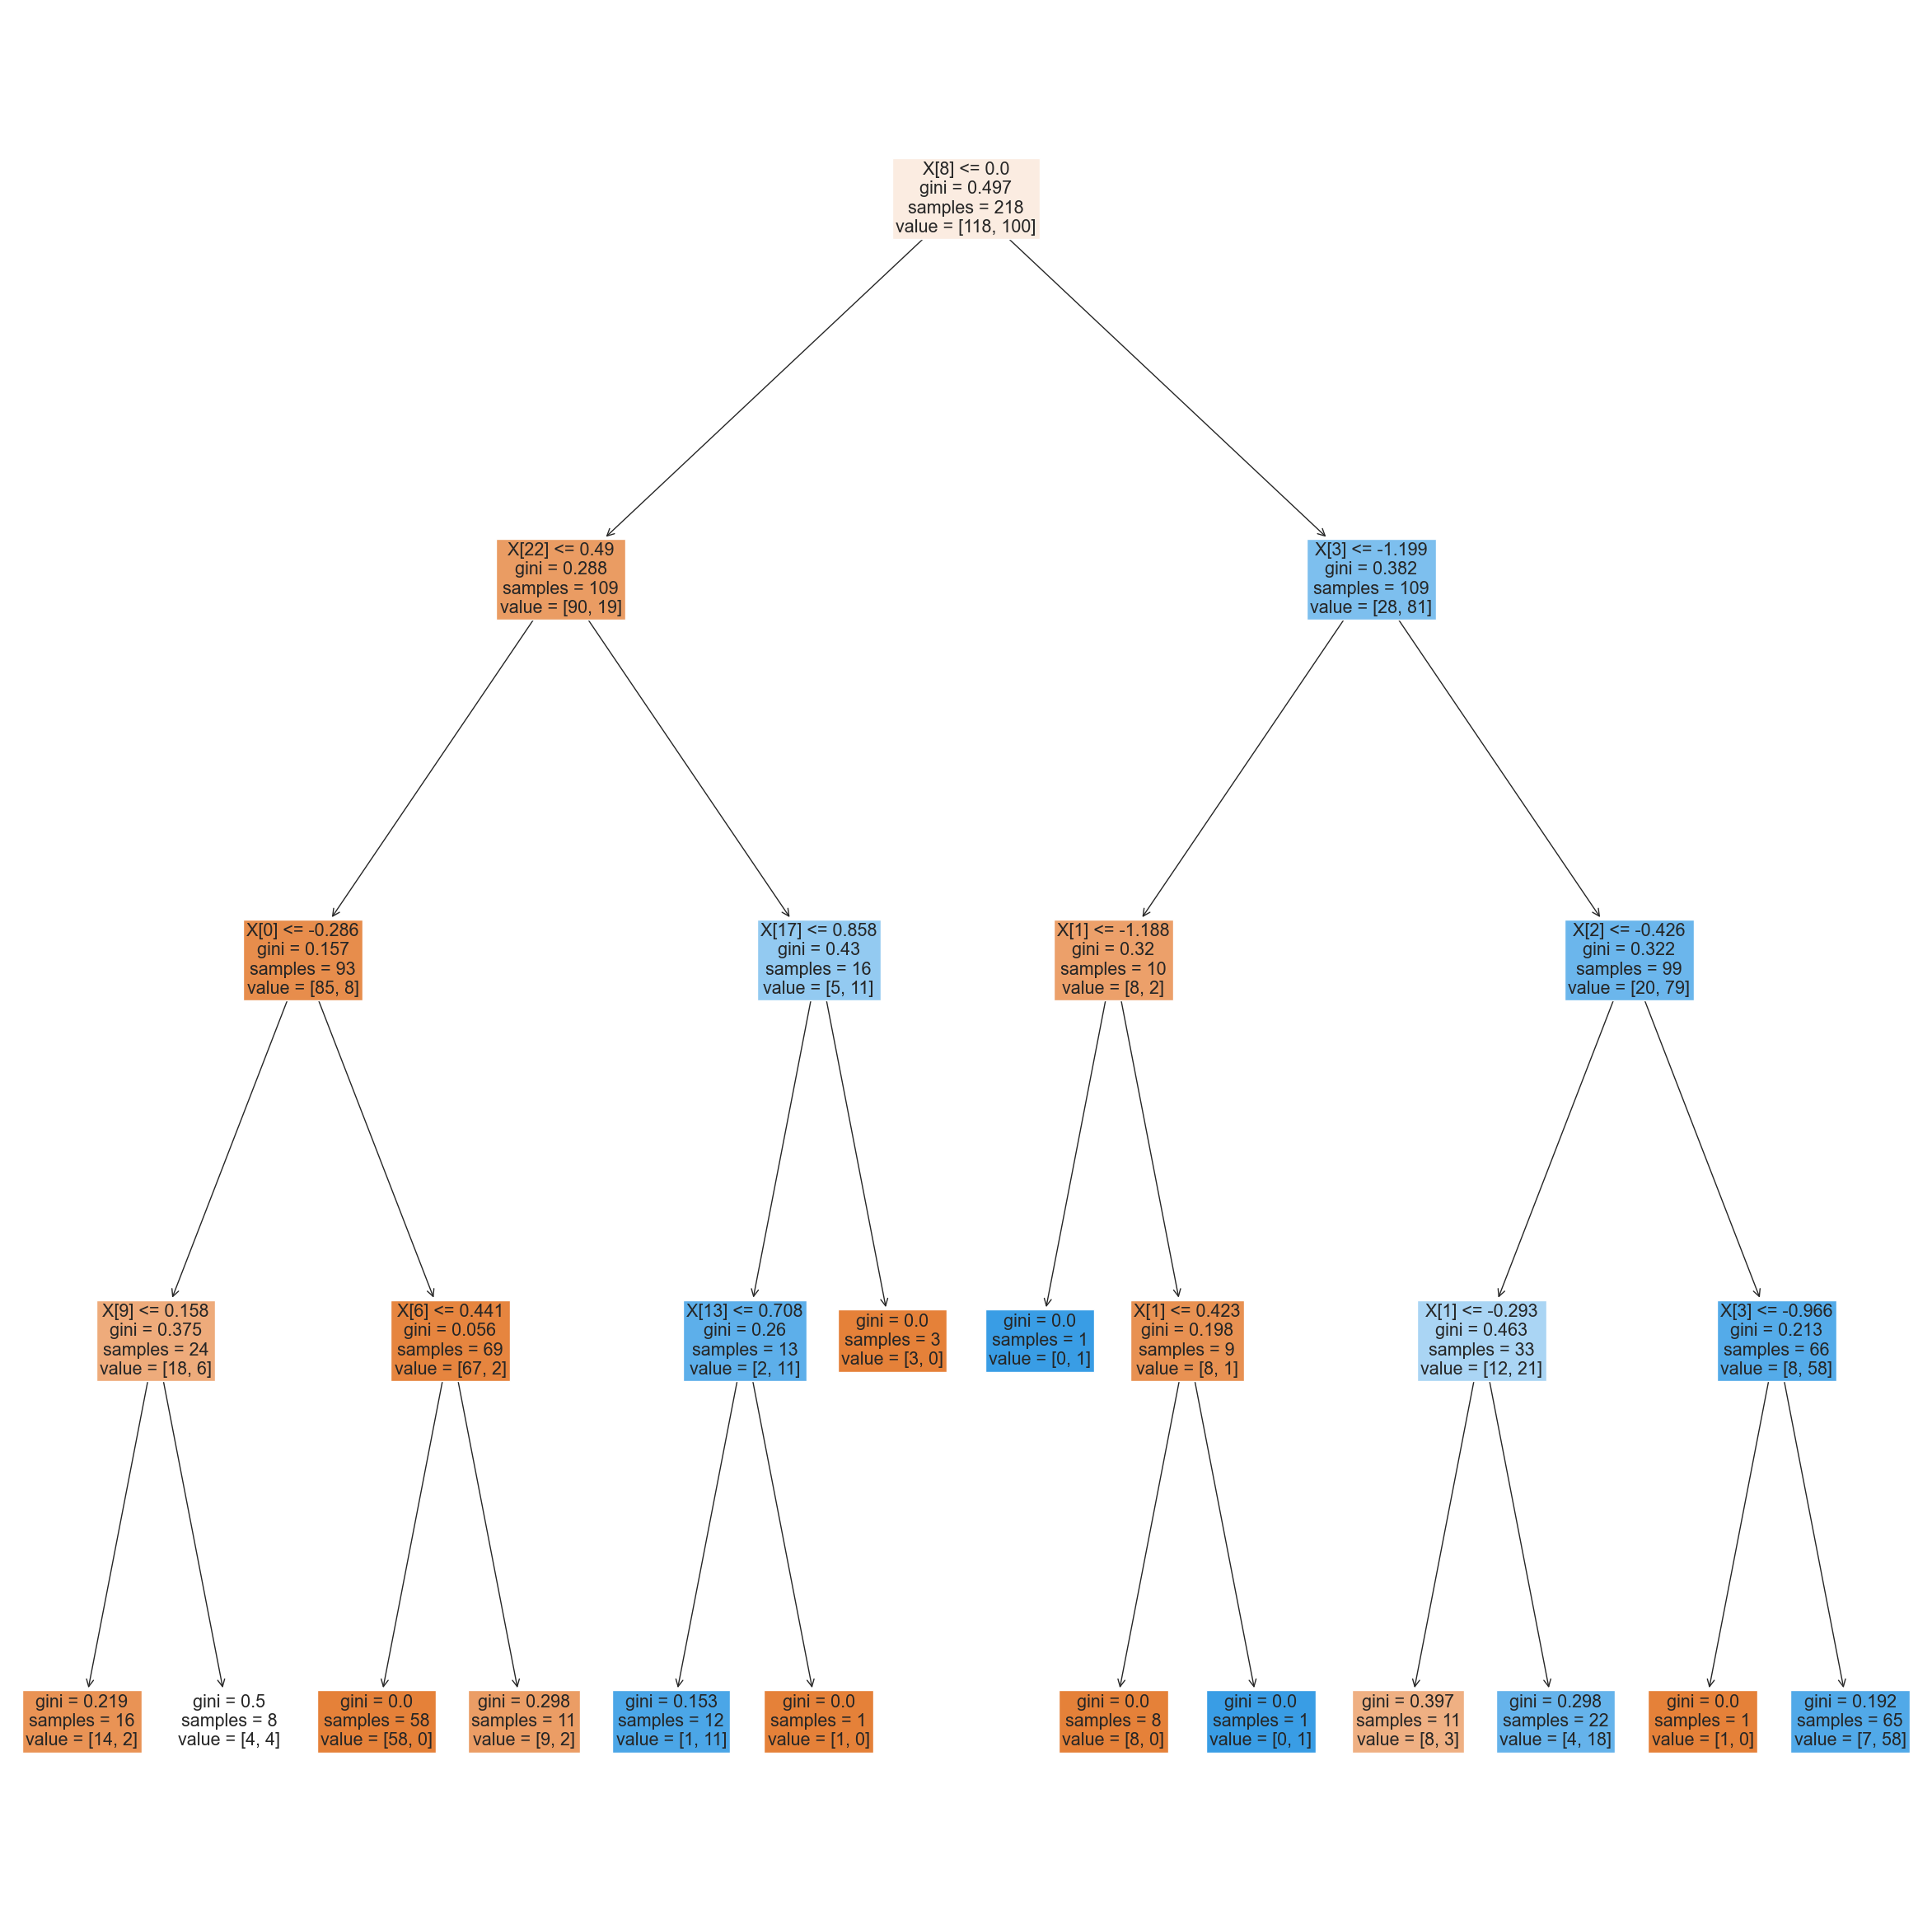

In [22]:
plt.figure(figsize = (30,30))
plot_tree(decision_tree = dt, filled = True)
plt.show()